# Промышленность Оптимизация производственных расходов металлургического комбината 

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Нам предстоит построить модель, которая предскажет температуру стали.

## План работы(содержание):

>[Промышленность Оптимизация производственных расходов металлургического комбината](#scrollTo=f_IqEwIJR2D2)

>>[План работы(содержание):](#scrollTo=HTjp7f3wR2D7)

>>[Цель проекта](#scrollTo=tqvIK4-qR2D7)

>>[Описание этапа обработки](#scrollTo=EvRj_5UHR2D8)

>>[Исходные данные](#scrollTo=mOnsWYBpR2D8)

>>>[Импорт библитек](#scrollTo=0yh2bAa4R2D9)

>>>[Откроем файл с данными и изучем общую информацию](#scrollTo=nwVXO-CiR2D-)

>>>[Описание данных](#scrollTo=YSyP7kAlR2EA)

>>>[Промежуточные выводы](#scrollTo=Q95hHSTgR2EA)

>>[Исследовательский анализ данных и предобраотка](#scrollTo=A8TFakrbR2EA)

>>>[Данные об электродах](#scrollTo=6jvkOVwBR2EB)

>>>>[Обобщение по arc](#scrollTo=1KhKsTksR2EE)

>>>[Данные об объеме сыпучих и проволочных материалов, а также о времени их подачи](#scrollTo=EbLMVPs1R2EE)

>>>>[Сыпучие материалы](#scrollTo=_2HibmnfR2EE)

>>>>[Обобщение по bulk](#scrollTo=baGovKyvR2EY)

>>>>[Проволочные материалы](#scrollTo=qVUkDERbR2EZ)

>>>>[Обобщение по Wire](#scrollTo=ON8d2YDfR2Eb)

>>>[Данные о температуре и продувке газом](#scrollTo=hQGauL4bR2Eb)

>>>>[Вывод по gas and temp](#scrollTo=H4hMDIYQR2Ef)

>>>[Промежуточные выводы по исследовательскому анализу данных](#scrollTo=wXa8j_23R2Ef)

>>[Формирование единой таблицы](#scrollTo=mTejDEUuR2Eg)

>>[Основная часть](#scrollTo=OPy-mv_1R2Ej)

>>>[Разделение на выборки](#scrollTo=SC-xBs1QTB6n)

>>>[Масштабирование](#scrollTo=0OJ21UVTT1b9)

>>>[Обучение и выбор моделей](#scrollTo=p1CA8YqbTuxU)

>>>>[Линейная регрессия с регуляризацией](#scrollTo=y1hITE0TTwYA)

>>>>[Catboost](#scrollTo=qikCRRY4UKax)

>>>>[Случайный лес](#scrollTo=8osDgkaRUS4S)

>>>>[Промежуточные выводы](#scrollTo=iB0jrLMaUWwM)

>>>[Тестирование лучшей модели](#scrollTo=PPqHfRfeR2Ek)

>>>>[Промежуточные выводы](#scrollTo=9zWclyOGR2Ek)

>>>[Анализ важности признаков](#scrollTo=TV8AS10RUb7I)

>>>>[Промежуточные выводы](#scrollTo=S9ZPdjJRUhDS)

>>>[Итоговый вывод](#scrollTo=VSTSvkrXR2Ek)

>>[Отчет](#scrollTo=D2CvuUuCR2Ek)

>>[Вопросы](#scrollTo=qx4F1wzPUmwv)



## Цель проекта

Предсказать конечную температуру полного цикла с ошибкой MAE меньше 6.8 на тексте. Расчитать метрику R квадрат. Разрешается брать только начальную темпрературу. Обучение модели с кросс-валидацией. Подбор для одной модели гиперпараметров. Использовать как признак можно только первую температуру.

## Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

## Исходные данные

### Импорт библитек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
RANDOM_STATE = 22052023

### Откроем файл с данными и изучем общую информацию

In [3]:
# Загрузка данных
try:
    arc = pd.read_csv("/datasets/data_arc_new.csv")
    bulk = pd.read_csv("/datasets/data_bulk_new.csv")
    bulk_time = pd.read_csv("/datasets/data_bulk_time_new.csv")
    gas = pd.read_csv("/datasets/data_gas_new.csv")
    temp = pd.read_csv("/datasets/data_temp_new.csv")
    wire = pd.read_csv("/datasets/data_wire_new.csv")
    wire_time = pd.read_csv("/datasets/data_wire_time_new.csv")
except:
    arc = pd.read_csv("https://code.s3.yandex.net/datasets/data_arc_new.csv")
    bulk = pd.read_csv("https://code.s3.yandex.net/datasets/data_bulk_new.csv")
    bulk_time = pd.read_csv(
        "https://code.s3.yandex.net/datasets/data_bulk_time_new.csv"
    )
    gas = pd.read_csv("https://code.s3.yandex.net/datasets/data_gas_new.csv")
    temp = pd.read_csv("https://code.s3.yandex.net/datasets/data_temp_new.csv")
    wire = pd.read_csv("https://code.s3.yandex.net/datasets/data_wire_new.csv")
    wire_time = pd.read_csv(
        "https://code.s3.yandex.net/datasets/data_wire_time_new.csv"
    )

In [4]:
# Проверка данных
dataframes = [arc, bulk, bulk_time, gas, temp, wire, wire_time]
names = ["arc", "bulk", "bulk_time", "gas", "temp", "wire", "wire_time"]

for df, name in zip(dataframes, names):
    print(f"--- {name} ---")
    print(df.head())
    print(df.info())
    print(df.isna().sum())
    print()

--- arc ---
   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   

   Реактивная мощность  
0             0.211253  
1             0.477438  
2             0.430460  
3             0.379979  
4             0.643691  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

### Промежуточные выводы

Мы загрузили семь файлов с данными. Количество строк в файлах различается. Вос всех файлах есть пропуски данных. Каждый файл содержит столбец key, возможно его можно будет использовать для объединения таблиц.

## Исследовательский анализ данных и предобраотка

### Данные об электродах

In [5]:
arc.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


In [6]:
# Проверим данные на дубликаты:
arc.duplicated().sum()

0

Активная мощность и реактивная мощность отличается в партиях. Будемм рассчитывать полную мощность

In [7]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [8]:
# Пропусков в этом файле нет. Приведем даты к формату Datetime:
arc["Начало нагрева дугой"] = pd.to_datetime(arc["Начало нагрева дугой"])
arc["Конец нагрева дугой"] = pd.to_datetime(arc["Конец нагрева дугой"])

In [9]:
arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [10]:
# есть отрицательное значение в реактивной мощности – нужно удалить этот ключ целиком(требование заказчика)
negative_power_keys = arc[arc["Реактивная мощность"] < 0]["key"]
print(negative_power_keys)
# Удалить строки с отрицательной реактивной мощностью
arc = arc[~arc["key"].isin(negative_power_keys)]

9780    2116
Name: key, dtype: int64


In [11]:
# Найти ключи с одним замером
one_measurement_keys = arc["key"].value_counts()[arc["key"].value_counts() == 1].index
print(one_measurement_keys)
# Удалить строки с одним замером
arc = arc[~arc["key"].isin(one_measurement_keys)]

Int64Index([1268, 2841,  343, 3112,  614, 1535, 1988, 2738,  943, 1281, 2112,
             732, 1974,  246,   49,  556, 1449, 1914, 3026,  269, 2795, 1169,
             661, 1911, 2582,  530,  977,  247,  248, 2194, 1766, 1369, 2179,
            1568,  112, 2472, 2025, 3059, 1615],
           dtype='int64')


In [12]:
# Высчитаем время нагрева и полную мощность.
arc["time"] = (arc["Конец нагрева дугой"] - arc["Начало нагрева дугой"]).dt.total_seconds()
arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0
...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,157.0
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,180.0
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,184.0
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,57.0


In [13]:
# Полная мощность рассчитывается как квадратный корень из суммы квадратов активной и реактивной мощностей.
arc["capacity"] = (
    arc["Активная мощность"] ** 2 + arc["Реактивная мощность"] ** 2
) ** 0.5
arc["power"] = arc["capacity"] * arc["time"]
arc["act_power"] = arc["Активная мощность"] * arc["time"]
arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,time,capacity,power,act_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0,0.371123,84.616003,69.569640
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0,0.902319,166.928978,141.646730
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0,0.722536,124.276277,99.813836
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0,0.642824,234.630603,189.251040
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0,1.079934,159.830252,128.335684
...,...,...,...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,157.0,0.532085,83.537345,69.038395
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,180.0,0.792429,142.637202,116.369640
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,184.0,1.293389,237.983620,191.309584
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,57.0,0.641792,36.582120,30.225219


In [14]:
# Сгруппируем данные по партиям и для каждой партии высчитаем суммарное потребление энергии на основе полной мощности (power) и активной мощности (act_power):
arc = (arc.groupby("key").agg({"time": sum, "power": sum, "act_power": sum}).reset_index())
arc.set_index("key", inplace=True)
arc

,time,power,act_power
key,,,
1,1098.0,770.282114,628.616930
2,811.0,481.760005,395.281800
3,655.0,722.837668,581.774624
4,741.0,683.455597,543.710274
5,869.0,512.169934,412.180480
...,...,...,...
3237,909.0,630.503534,493.152191
3238,546.0,286.052252,229.390861
3239,1216.0,941.538764,751.674870


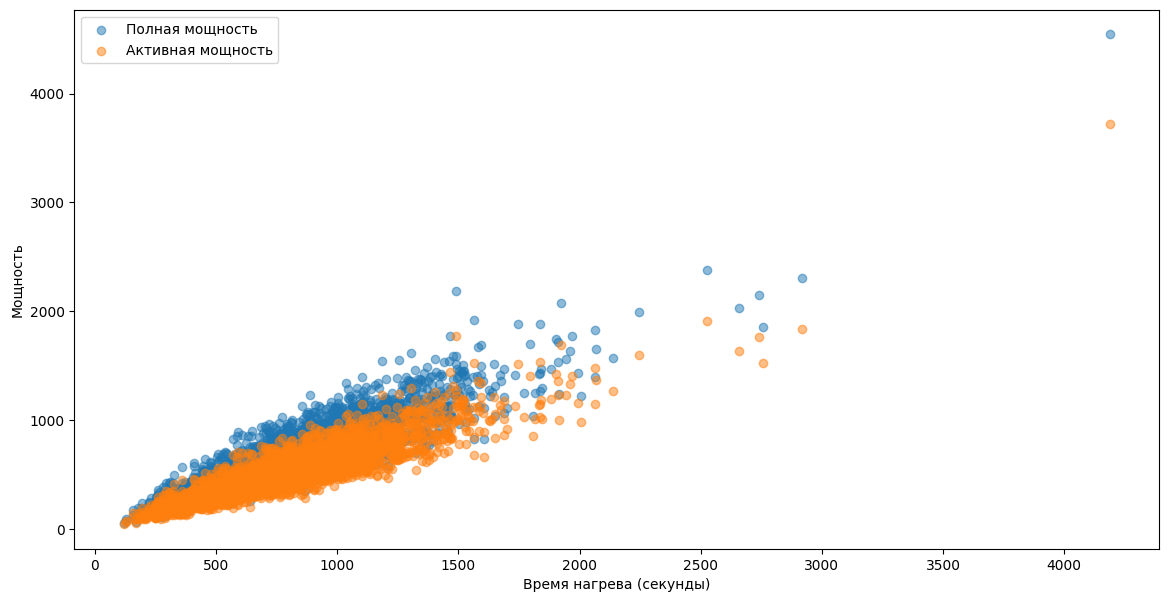

In [15]:
# График зависимости времени от мощности и полной мощности

plt.figure(figsize=(14, 7))

plt.scatter(arc["time"], arc["power"], alpha=0.5, label="Полная мощность")
plt.scatter(arc["time"], arc["act_power"], alpha=0.5, label="Активная мощность")
plt.xlabel("Время нагрева (секунды)")
plt.ylabel("Мощность")
plt.legend()

plt.show()

#### Обобщение по arc

1. Привели колонки  временем к формату datatime
2. Есть отрицательное значение мощности - ключ удалили целиком(требование заказчика)
3. Нашли ключи с одним замером и удалили их(требование заказчика)
4. Высчитаем время нагрева и полную мощность.
5. Сгруппировали данные по партиям и для каждой партии высчитаем суммарное потребление энергии на основе полной мощности (power) и активной мощности
6. Построили график зависимости мощности от времени. Чем больше время нагрева тем больше мощность
7. Пропуски и дубликаты отсутствуют


### Данные об объеме сыпучих и проволочных материалов, а также о времени их подачи


#### Сыпучие материалы

In [16]:
bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [17]:
bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [18]:
bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [19]:
bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [20]:
bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [21]:
bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [22]:
# Проверим данные на дубликаты:
bulk.duplicated().sum()

0

In [23]:
# Проверим данные на дубликаты:
bulk_time.duplicated().sum()

0

In [24]:
# Пропуски заменим нулями:
bulk = bulk.fillna(0)
bulk

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0
3125,3238,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0
3126,3239,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0
3127,3240,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,54.0


In [25]:
# Проиндексируем по номерам партий:
bulk.set_index('key', inplace = True)
bulk.head()


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [26]:
# Проиндексируем по номерам партий:
bulk_time.set_index('key', inplace = True)
# Изменим формат времени на datime
bulk_columns = ['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']

for col in bulk_columns:
    bulk_time[col] = pd.to_datetime(bulk_time[col])

bulk_time.head()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47


#### Обобщение по bulk

1. Множество пропусков. Обусловлено спецификой технологического процесса. Пропуски заменили нулями(от заказчика)
2. Отсутствуют дубликаты
3. Проиндексировали по номеру ключа
4. Привели формат времени к datetime

#### Проволочные материалы

In [27]:
wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [28]:
wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [29]:
wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [30]:
wire_time.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [31]:
# Проверим данные на дубликаты:
wire.duplicated().sum()

0

In [32]:
# Проверим данные на дубликаты:
wire_time.duplicated().sum()

0

In [33]:
# Пропуски заменим нулями:
wire = wire.fillna(0)
wire

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3077,3238,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3078,3239,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3079,3240,34.070400,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Проиндексируем по номерам партий:
wire.set_index('key', inplace = True)
wire.head()

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Проиндексируем по номерам партий:
wire_time.set_index('key', inplace = True)

# Изменим формат времени на datime
wire_columns = ['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']

for col in wire_columns:
    wire_time[col] = pd.to_datetime(wire_time[col])

wire_time.head()


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


#### Обобщение по Wire


1. Множество пропусков. Обусловлено спецификой технологического процесса. Пропуски заменили нулями(от заказчика)
2. Отсутствуют дубликаты
3. Проиндексировали по номеру ключа
4. Привели формат времени к datetime

### Данные о температуре и продувке газом 


In [36]:
gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [37]:
temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [38]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [39]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [40]:
temp.isna().sum().to_frame()


,0
key,0
Время замера,0
Температура,3427


В столбце в температурой много пропусков но заменить нечем. Мы имеем дело с промышленными данными, можно предположить, что пропуски возникли при отказах измерительного оборудования.


In [41]:
# Приведем время к формату datatime
temp['Время замера'] = pd.to_datetime(temp['Время замера'])
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


In [42]:
# Проверим дубликаты:
print(gas.duplicated().sum())
print(temp.duplicated().sum())

0
0


Text(0.5, 1.0, 'Boxplot')

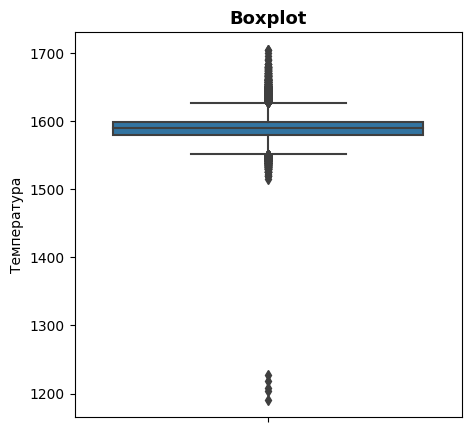

In [43]:
plt.figure(figsize=(5,5))
sns.boxplot(data=temp, y='Температура')
plt.title('Boxplot', fontsize=13, fontweight='bold')

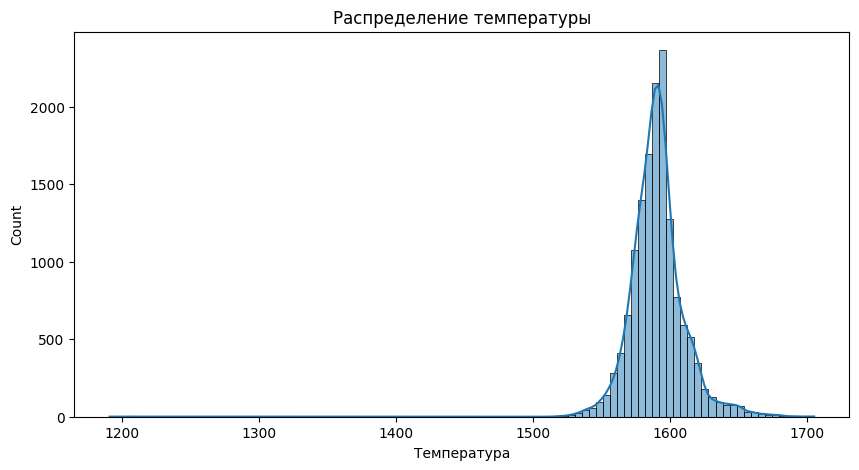

In [44]:
# Анализ распределения температуры
plt.figure(figsize=(10,5))
sns.histplot(temp['Температура'], bins=100, kde=True)
plt.title('Распределение температуры')
plt.show()

In [45]:
# есть низкие температуры  < 1500 – нужно удалить из объединенной выборки(требование заказчика)
temp = temp[temp['Температура'] >= 1500]
# Затем для удаления партий с одним замером, мы сначала найдем такие партии, а затем удалим их:
# Находим партии с одним замером
one_measurement_keys = temp['key'].value_counts()
one_measurement_keys = one_measurement_keys[one_measurement_keys == 1].index
print(one_measurement_keys)
# Удаляем эти партии из temp
temp = temp[~temp['key'].isin(one_measurement_keys)]
print(temp.head(6))

Int64Index([2993, 2992, 2991, 2990, 2995, 2989, 2988, 2987, 2994, 2999,
            ...
            2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 3241],
           dtype='int64', length=740)
   key        Время замера  Температура
0    1 2019-05-03 11:02:04       1571.0
1    1 2019-05-03 11:07:18       1604.0
2    1 2019-05-03 11:11:34       1618.0
3    1 2019-05-03 11:18:04       1601.0
4    1 2019-05-03 11:25:59       1606.0
5    1 2019-05-03 11:30:38       1613.0


In [46]:
# Для агрегирования данных по первой и последней температуре для каждого ключа (или партии), мы можете использовать следующий подход:
# Сначала сортируем данные по времени замера
temp.sort_values(by=['key', 'Время замера'], inplace=True)

# Затем группируем данные по ключу и выбираем первую и последнюю температуру для каждого ключа
first_temp = temp.groupby('key')['Температура'].first()
last_temp = temp.groupby('key')['Температура'].last()

# Создаем новый DataFrame с двумя столбцами: первой и последней температурой
aggregated_temp = pd.DataFrame({'first_temp': first_temp, 'last_temp': last_temp})
aggregated_temp


<ipython-input-46-051f1511fa5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.sort_values(by=['key', 'Время замера'], inplace=True)


,first_temp,last_temp
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
2495,1570.0,1591.0
2496,1554.0,1591.0
2497,1571.0,1589.0


In [47]:
# Сначала сортируем данные по времени замера
temp.sort_values(by=['key', 'Время замера'], inplace=True)

# Затем группируем данные по ключу и выбираем первое и последнее время замера для каждого ключа
first_time = temp.groupby('key')['Время замера'].first()
last_time = temp.groupby('key')['Время замера'].last()

# Добавляем новый столбец в DataFrame, который представляет собой разницу во времени между первым и последним замером
aggregated_temp['time_diff'] = last_time - first_time

<ipython-input-47-d17d59369854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.sort_values(by=['key', 'Время замера'], inplace=True)


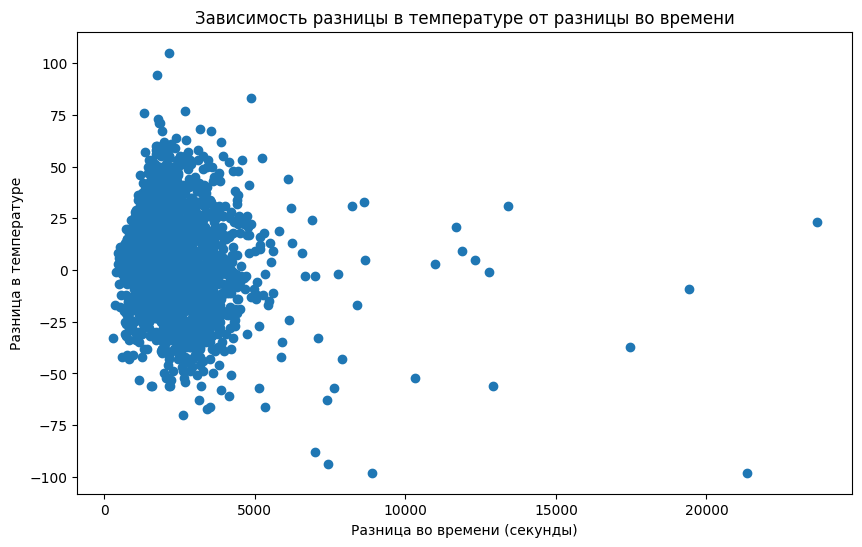

In [48]:
import matplotlib.pyplot as plt

# Переводим разницу времени в секунды для более простого отображения
aggregated_temp['time_diff_sec'] = aggregated_temp['time_diff'].dt.total_seconds()

# Подсчет разницы температур
aggregated_temp['temp_diff'] = aggregated_temp['last_temp'] - aggregated_temp['first_temp']

plt.figure(figsize=(10, 6))
plt.scatter(aggregated_temp['time_diff_sec'], aggregated_temp['temp_diff'])
plt.title('Зависимость разницы в температуре от разницы во времени')
plt.xlabel('Разница во времени (секунды)')
plt.ylabel('Разница в температуре')
plt.show()


Есть выбросы но по требованию заказчика с ними ничего не делаем


In [49]:
temp = aggregated_temp
temp

,first_temp,last_temp,time_diff,time_diff_sec,temp_diff
key,,,,,
1,1571.0,1613.0,0 days 00:28:34,1714.0,42.0
2,1581.0,1602.0,0 days 00:21:05,1265.0,21.0
3,1596.0,1599.0,0 days 00:29:13,1753.0,3.0
4,1601.0,1625.0,0 days 00:20:20,1220.0,24.0
5,1576.0,1602.0,0 days 00:25:36,1536.0,26.0
...,...,...,...,...,...
2495,1570.0,1591.0,0 days 00:23:00,1380.0,21.0
2496,1554.0,1591.0,0 days 00:28:25,1705.0,37.0
2497,1571.0,1589.0,0 days 00:16:02,962.0,18.0


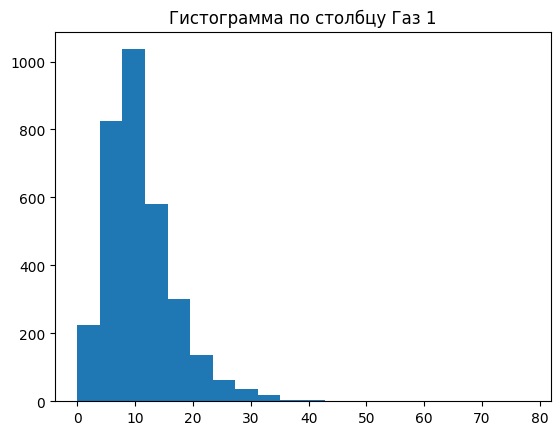

In [50]:
plt.hist((list(gas['Газ 1'])), bins=20)
plt.title('Гистограмма по столбцу Газ 1')
plt.show()

In [51]:
# Проиндексируем по номерам партий:
gas.set_index('key', inplace = True)
gas.head()

,Газ 1
key,
1,29.749986
2,12.555561
3,28.554793
4,18.841219
5,5.413692


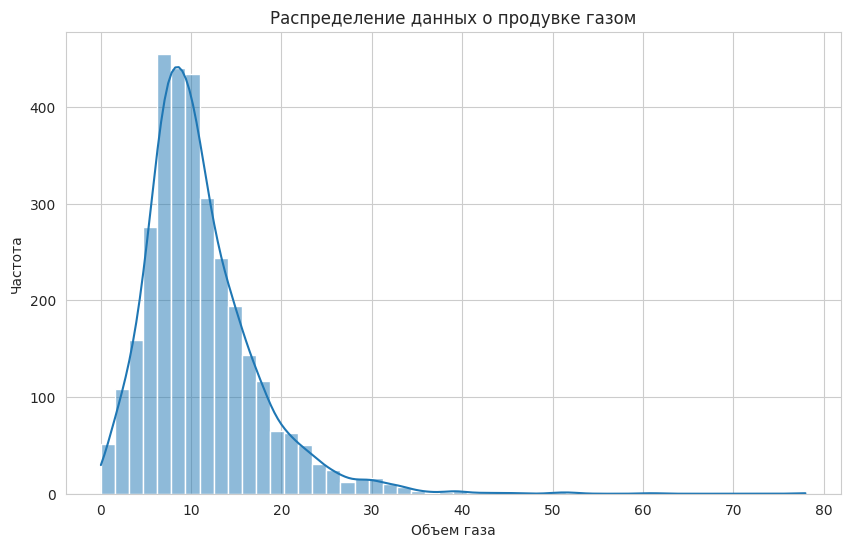

In [52]:
sns.set_style('whitegrid') # устанавливаем стиль графика

plt.figure(figsize=(10,6)) # задаем размер графика
sns.histplot(data=gas, x='Газ 1', kde=True, bins=50) # строим гистограмму и ядерную оценку плотности (kde)

plt.title('Распределение данных о продувке газом') # заголовок графика
plt.xlabel('Объем газа') # подпись оси x
plt.ylabel('Частота') # подпись оси y
plt.show() # показываем график

#### Вывод по gas and temp

1. В столбце в температурой много пропусков. Везде где температура меньше температуры плавления удаляем.(1500)
2. Дубликаты отсутствуют
3. Партии с одним замером нашли и удалили 
4. Агегировали по key оставили только начальную и конечную температуру. Разницу времени между ними, разницу температур
5. в таблице gas проиндексировали по номеру партии

### Промежуточные выводы по исследовательскому анализу данных 

Мы провели исследовательский анализ данных, в ходе которого было выявлено:
1. Дубликаты отсутствуют.
2. Во всех таблицах были выявлены пропуски данных. Природа части пропусков известна от заказчика.
3. Партии с одним замером в температуре, мощности электродов удалили(от заказчика)
4. В некоторых колонках были выявлены подозрительные значения. Они могли появиться в данных например, в результате сбоя измерительного оборудования;
5. Были выявлены замеры температуры менее 1500 градусов. Данные удалены. (от заказчика)
6. Была выявлена партия с отрицательной реактивной мощностью. Данные этой партии удалили.(от заказчика)
7. Во всех таблицах количество уникальных значений в столбце key различается. При формировании единой таблицы обучающих признаков будет использовать inner.
8. Все таблицы проиндекировали по номеру партии
9. Пропуски в сыпучих материалах заменили на "0"(от заказчика)
10. Высчитали время нагрева и полную мощность.
11. Время привели к формату datetime
12. В таблице temp оставили агрегировали по key. Оставили значение первой и последней температуры разницу между ними. И время первой и посленего замера и разница между ними

## Формирование единой таблицы

Данные о времени подачи материала нам не пригодятся, поэтому не будем добавлять их в единую таблицу.



In [57]:
# Объединение всех таблиц в одну по ключу
df = arc.join([temp, gas, wire, bulk], how='inner')
df.tail()

,time,power,act_power,first_temp,last_temp,time_diff,time_diff_sec,temp_diff,Газ 1,Wire 1,...,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,,,,,,,
2495,723.0,694.177326,571.539318,1570.0,1591.0,0 days 00:23:00,1380.0,21.0,7.125735,89.150879,...,0.0,0.0,0.0,0.0,90.0,0.0,256.0,0.0,129.0,223.0
2496,940.0,815.818538,675.222467,1554.0,1591.0,0 days 00:28:25,1705.0,37.0,9.412616,114.179527,...,0.0,0.0,0.0,0.0,122.0,0.0,256.0,0.0,129.0,226.0
2497,569.0,823.020520,680.326674,1571.0,1589.0,0 days 00:16:02,962.0,18.0,6.271699,94.086723,...,0.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0
2498,750.0,581.810739,474.918795,1591.0,1594.0,0 days 00:25:20,1520.0,3.0,14.953657,118.110717,...,0.0,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0
2499,883.0,532.386183,427.922553,1569.0,1603.0,0 days 00:25:37,1537.0,34.0,11.336151,110.160958,...,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,126.0,227.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 1 to 2499
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   time           2303 non-null   float64        
 1   power          2303 non-null   float64        
 2   act_power      2303 non-null   float64        
 3   first_temp     2303 non-null   float64        
 4   last_temp      2303 non-null   float64        
 5   time_diff      2303 non-null   timedelta64[ns]
 6   time_diff_sec  2303 non-null   float64        
 7   temp_diff      2303 non-null   float64        
 8   Газ 1          2303 non-null   float64        
 9   Wire 1         2303 non-null   float64        
 10  Wire 2         2303 non-null   float64        
 11  Wire 3         2303 non-null   float64        
 12  Wire 4         2303 non-null   float64        
 13  Wire 5         2303 non-null   float64        
 14  Wire 6         2303 non-null   float64        
 15  Wire

Данные объеденены, посмотрим на корреляции.

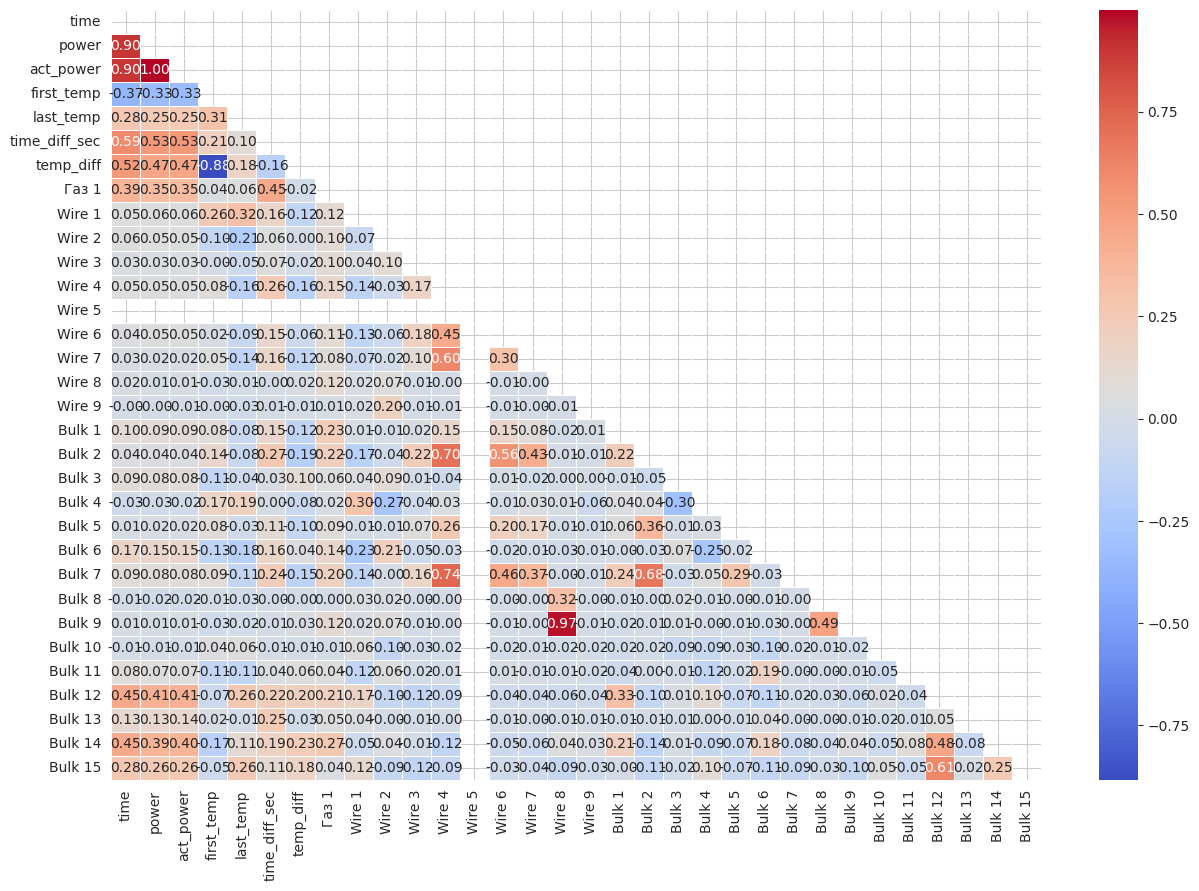

In [55]:
# Вычисляем матрицу корреляций
corr_matrix = df.corr(numeric_only=True)

# Создаем маску для отображения только нижнего треугольника матрицы (так как матрица корреляций симметрична)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Размер графика
plt.figure(figsize=(15, 10))

# Построение тепловой карты
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

# Поворот заголовков для лучшего отображения
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Критерий Пирсона не выявил сильных линейных корреляций с целевым признаком. Есть корреляция между power and time, power and act_power, что логично

## Основная часть

### Разделение на выборки

### Масштабирование

### Обучение и выбор моделей

#### Линейная регрессия с регуляризацией

#### Catboost

#### Случайный лес

#### Промежуточные выводы

### Тестирование лучшей модели

#### Промежуточные выводы

### Анализ важности признаков

#### Промежуточные выводы

### Итоговый вывод

## Отчет 

## Вопросы

1. План работ я сделал как содержание и по нему буду выполнять, так пойдет? (collab) 
2. Может удалить столбцы wire and build с малыми значениями?  
3. Больше пока вопросов нет.  